In [3]:
import os
from pathlib import Path
import energyscope as es
from amplpy import AMPL

# INITIAL MODEL 

In [4]:
model_directory = "/Users/achuat/Documents/Projects/Governance_EnergyScope/EnergyScopePy_dev/case_studies_initial/"

ampl = AMPL()
ampl.set_option("solver", 'gurobi')
# Read the model and data files.
ampl.read(os.path.join(model_directory, "es_model.mod"))
ampl.read_data(os.path.join(model_directory, "ESTD_data.dat"))
ampl.read_data(os.path.join(model_directory, "ESTD_12TD.dat"))
ampl.solve()

Gurobi 10.0.2: Gurobi 10.0.2: optimal solution; objective 43941.28319
45290 simplex iterations
106 barrier iterations


In [5]:
totalcost = ampl.get_variable("TotalCost").get_values().to_pandas()
print(totalcost)
totalgwp = ampl.get_variable("TotalGWP").get_values().to_pandas()
print(totalgwp)

   TotalCost.val
0   43941.283192
   TotalGWP.val
0  70722.979413


<Axes: >

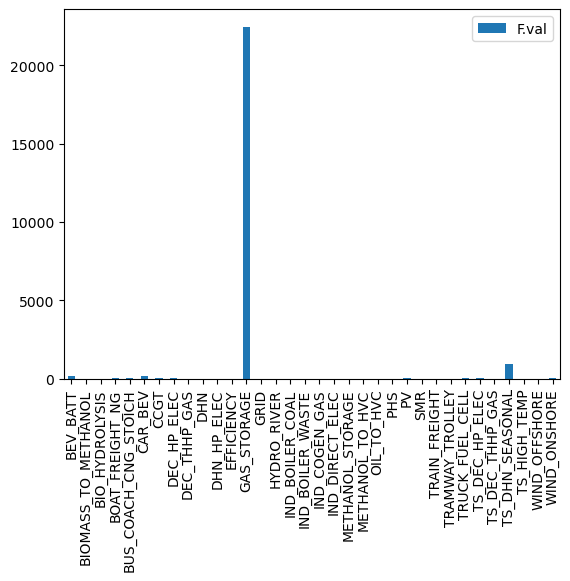

In [6]:
df_ini = ampl.get_variable("F").get_values().to_pandas()
df_ini[df_ini!=0].dropna().plot.bar()

# INFRASTRUCTURE

In [7]:
model_directory = "/Users/achuat/Documents/Projects/Governance_EnergyScope/EnergyScopePy_dev/case_studies/Infrastructure/"

ampl = AMPL()
ampl.set_option("solver", 'gurobi')
# Read the model and data files.
ampl.read(os.path.join(model_directory, "es_model.mod"))
ampl.read_data(os.path.join(model_directory, "ESTD_data.dat"))
ampl.read_data(os.path.join(model_directory, "ESTD_12TD.dat"))
ampl.solve()
totalcost = ampl.get_variable("TotalCost").get_values().to_pandas()
print(totalcost)
totalgwp = ampl.get_variable("TotalGWP").get_values().to_pandas()
print(totalgwp)

	presolve, variable Share_freight_train:
		impossible deduced bounds: lower = 0.109, upper = 0
	presolve, variable Share_freight_train:
		impossible deduced bounds: lower = 0.109, upper = 0
	presolve, variable Share_freight_train:
		impossible deduced bounds: lower = 0.109, upper = 0
	presolve, variable Share_freight_train:
		impossible deduced bounds: lower = 0.109, upper = 0
	presolve, variable Share_freight_train:
		impossible deduced bounds: lower = 0.109, upper = 0
	571 presolve messages suppressed.
	
	Please report any bugs at: https://github.com/ampl/amplpy
	
	For support/feedback go to https://discuss.ampl.com or e-mail <support@ampl.com>
	
   TotalCost.val
0              0
   TotalGWP.val
0             0


In [8]:
data = ampl.get_parameter('layers_in_out').get_values().toPandas()
data

layers_in_out
index0  index1                     
AMMONIA AMMONIA                 1.0
        CO2_ATM                 0.0
        CO2_CAPTURED            0.0
        CO2_INDUSTRY            0.0
        COAL                    0.0
...                             ...
WOOD    RES_WIND                0.0
        URANIUM                 0.0
        WASTE                   0.0
        WET_BIOMASS             0.0
        WOOD                    1.0

[6042 rows x 1 columns]

In [9]:
totalcost = ampl.get_variable("TotalCost").get_values().to_pandas()
print(totalcost)
totalgwp = ampl.get_variable("TotalGWP").get_values().to_pandas()
print(totalgwp)

   TotalCost.val
0              0
   TotalGWP.val
0             0


<Axes: >

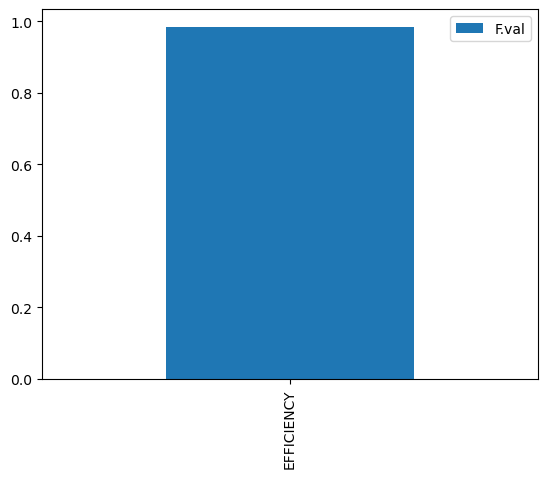

In [10]:
df_infra = ampl.get_variable("F").get_values().to_pandas()
df_infra[df_infra!=0].dropna().plot.bar()

In [11]:
df_infra[df_infra!=0].dropna()

,F.val
EFFICIENCY,0.985222


In [12]:
df_infra


,F.val
AMMONIA_STORAGE,0.0
AMMONIA_TO_H2,0.0
ATM_CCS,0.0
BATT_LI,0.0
BEV_BATT,0.0
...,...
TS_DHN_DAILY,0.0
TS_DHN_SEASONAL,0.0
TS_HIGH_TEMP,0.0
WIND_OFFSHORE,0.0


## Comparison

In [13]:
df_diff = df_ini-df_infra
print(df_diff)

                      F.val
AMMONIA_STORAGE    0.000000
AMMONIA_TO_H2      0.000000
ATM_CCS            0.000000
BATT_LI            0.000000
BEV_BATT         175.560136
...                     ...
TS_DHN_DAILY       0.000000
TS_DHN_SEASONAL  913.937618
TS_HIGH_TEMP       1.834661
WIND_OFFSHORE      6.000000
WIND_ONSHORE      10.000000

[148 rows x 1 columns]


<Axes: >

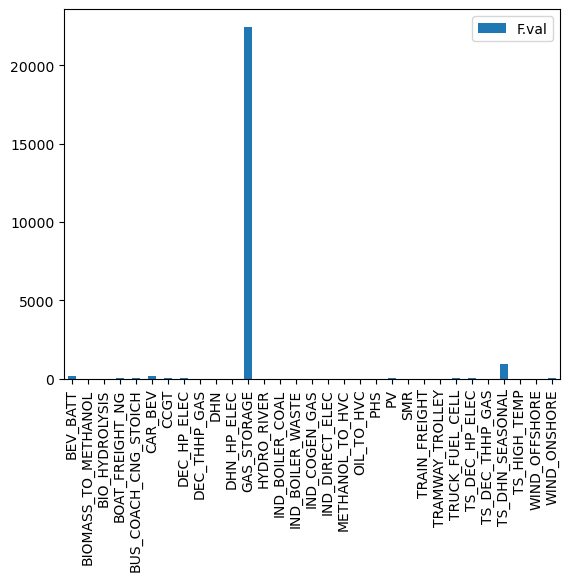

In [14]:
df_diff[df_diff>1e-1].dropna().plot.bar()